In [4]:
# Important note: you do not have to modify this file for your homework.
%timeit
from IPython.display import display
import ipyparallel as ipp
from ipyparallel.error import TimeoutError
import util
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

In [15]:
def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 0.01
    print(learning_rate)
    i = 0
    while True:
        i += 1
        
        learning_rate = 1/(i*i)
        
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 1000000 == 0:
#             print("Learn.. Rate: ", learning_rate)
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return theta

In [5]:
cluster = ipp.Client()
lb_view = cluster.load_balanced_view()

print( "Profile: %s" % cluster.profile)
print ("Engines: %s" % len(lb_view))

Profile: default
Engines: 4


In [16]:
%timeit
print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)
# lb_view.map(logistic_regression, Xb, Yb, block=True)
# lb_view(logistic_regression(Xb, Yb), block=True)
theta=logistic_regression(Xb, Yb)


==== Training model on data set B ====
0.01
Finished 1000000 iterations
Finished 2000000 iterations
Finished 3000000 iterations
Finished 4000000 iterations
Finished 5000000 iterations
Finished 6000000 iterations
Finished 7000000 iterations
Finished 8000000 iterations
Finished 9000000 iterations
Finished 10000000 iterations
Converged in 10734421 iterations


In [17]:
print(theta)

[0.05174125 0.18612784 0.15255038]


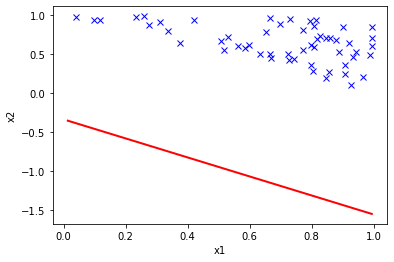

In [20]:
util.plot(Xb, Yb, theta, "P01.jpg")

In [21]:
print(Yb[Yb==-1])

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.]
